In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
poss = [np.array([1, 0])] # initial position
vels = [np.array([0, -1])] # initial velocity

n_steps = 2000
dt = 1/50

time = np.arange(n_steps) * dt

for i in range(n_steps-1):
    
    #vel = vels[-1] + poss[-1] * dt
    vel = poss[-1][::-1] * np.array([1,-1])
    vels.append(vel)
    
    poss.append(poss[-1] + vel * dt)

poss = np.array(poss)
vels = np.array(vels)

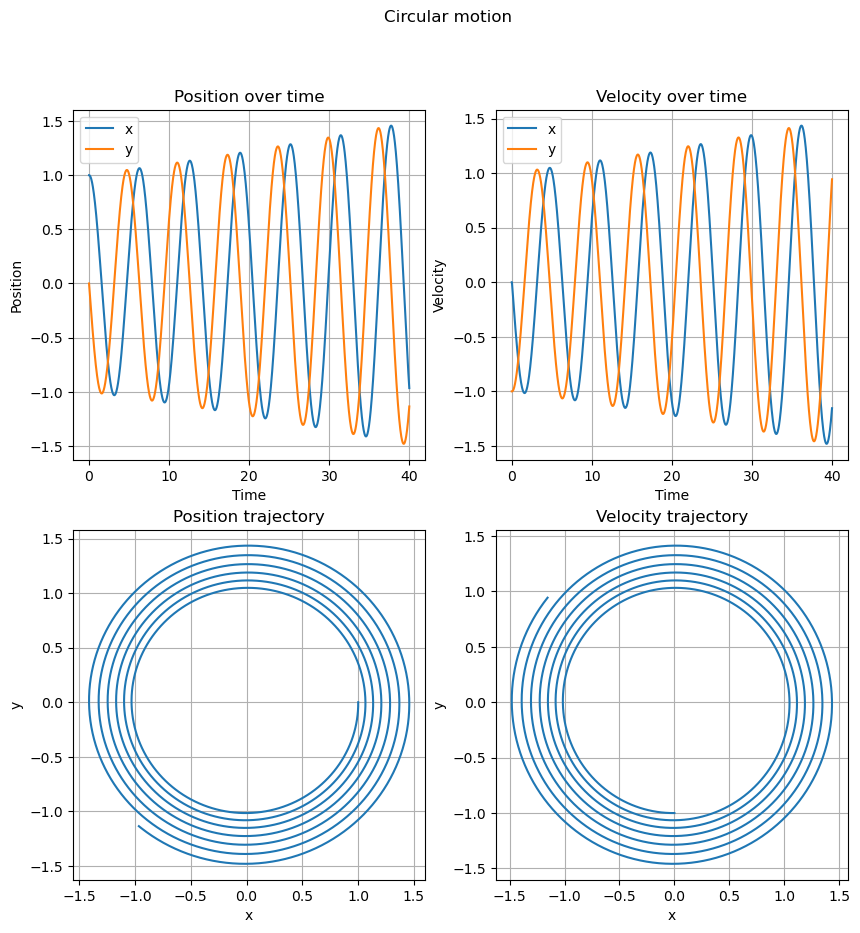

In [20]:
plt.figure(figsize=(10, 10))
plt.suptitle('Circular motion')

plt.subplot(2, 2, 1)
plt.title('Position over time')
plt.xlabel('Time')
plt.ylabel('Position')
plt.plot(time, poss.T[0], label='x')
plt.plot(time, poss.T[1], label='y')
plt.grid()
plt.legend()

plt.subplot(2, 2, 2)
plt.title('Velocity over time')
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.plot(time, vels.T[0], label='x')
plt.plot(time, vels.T[1], label='y')
plt.grid()
plt.legend()

plt.subplot(2, 2, 3)
plt.title('Position trajectory')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(poss.T[0], poss.T[1])
plt.grid()

plt.subplot(2, 2, 4)   
plt.title('Velocity trajectory')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(vels.T[0], vels.T[1])
plt.grid()



In [ ]:
poss = [np.array([1, 0])]
vels = [np.array([0, -1])]
accs = [np.array([-1, 0])]

n_steps = 1000
dt = 1/50

time = np.arange(n_steps) * dt

for i in range(n_steps-1):
    acc = -poss[-1] # harmonic oscillator simulation ???
    accs.append(acc)
    vel = vels[-1] + acc * dt
    vels.append(vel)
    
    poss.append(poss[-1] + vel * dt)

poss = np.array(poss)
vels = np.array(vels)
accs = np.array(accs)


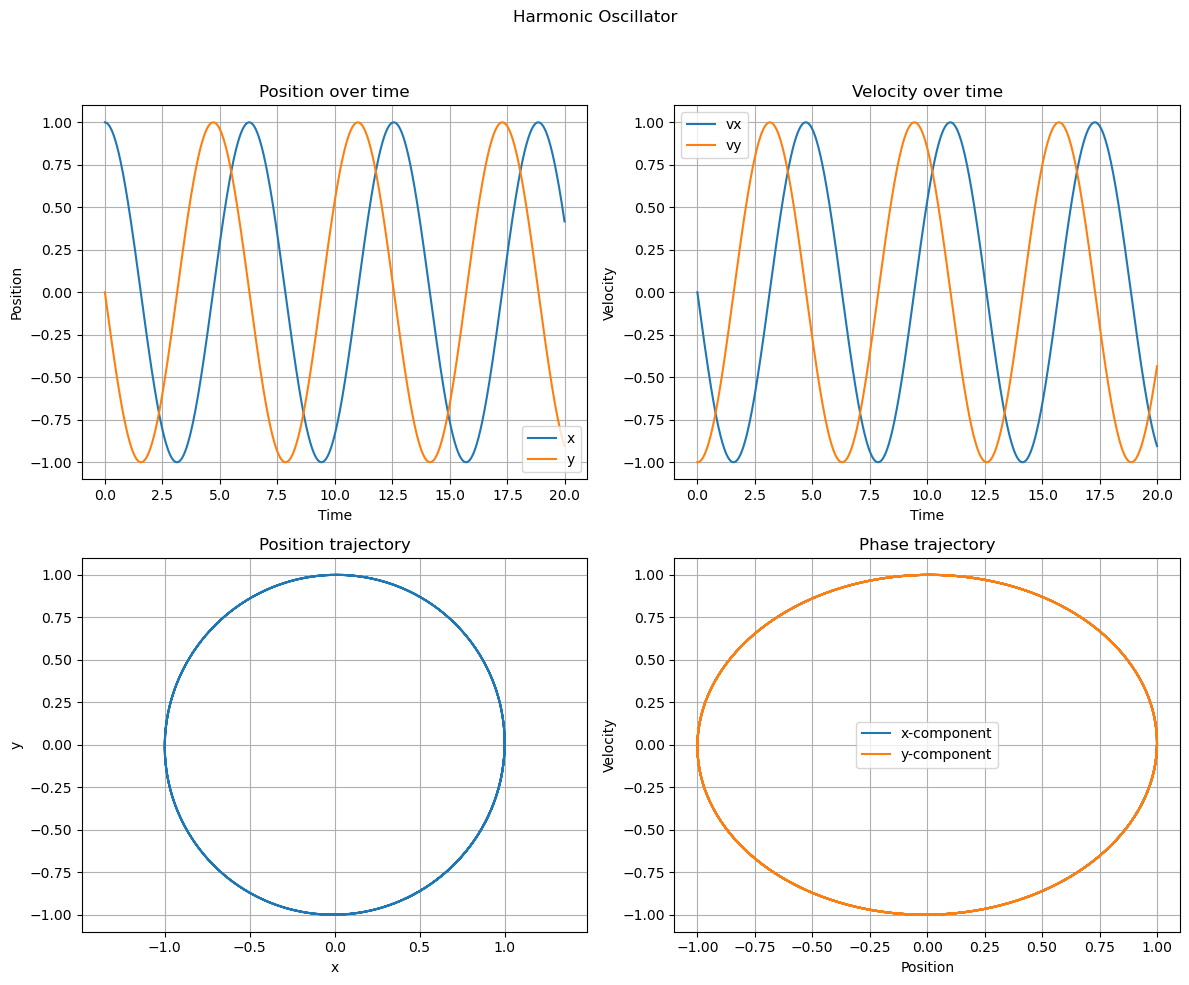

In [24]:
plt.figure(figsize=(12, 10))
plt.suptitle('Harmonic Oscillator')

plt.subplot(2, 2, 1)
plt.title('Position over time')
plt.xlabel('Time')
plt.ylabel('Position')
plt.plot(time, poss.T[0], label='x')
plt.plot(time, poss.T[1], label='y')
plt.grid()
plt.legend()

plt.subplot(2, 2, 2)
plt.title('Velocity over time')
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.plot(time, vels.T[0], label='vx')
plt.plot(time, vels.T[1], label='vy')
plt.grid()
plt.legend()

plt.subplot(2, 2, 3)
plt.title('Position trajectory')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(poss.T[0], poss.T[1])
plt.grid()
plt.axis('equal')  # To maintain proper proportions

plt.subplot(2, 2, 4)   
plt.title('Phase trajectory')
plt.xlabel('Position')
plt.ylabel('Velocity')
# For x-component
plt.plot(poss.T[0], vels.T[0], label='x-component')
# For y-component
plt.plot(poss.T[1], vels.T[1], label='y-component')
plt.grid()
plt.legend()

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Improves subplot positioning
plt.show()

In [25]:
s_0 = np.array([1, 0])
ss = [s_0]

dt = 1/50
n_steps = 1000
time = np.arange(n_steps) * dt

A  = np.array([[1-(dt**2)/2, dt],
               [-dt, 1-(dt**2)/2]])

print(A)


for i in range(n_steps-1):
    s_ = A @ ss[-1]
    ss.append(s_)

ss = np.array(ss)


[[ 0.9998  0.02  ]
 [-0.02    0.9998]]


(-1.1000024149742444,
 1.1000026845035713,
 -1.1000080839336357,
 1.1000154901808608)

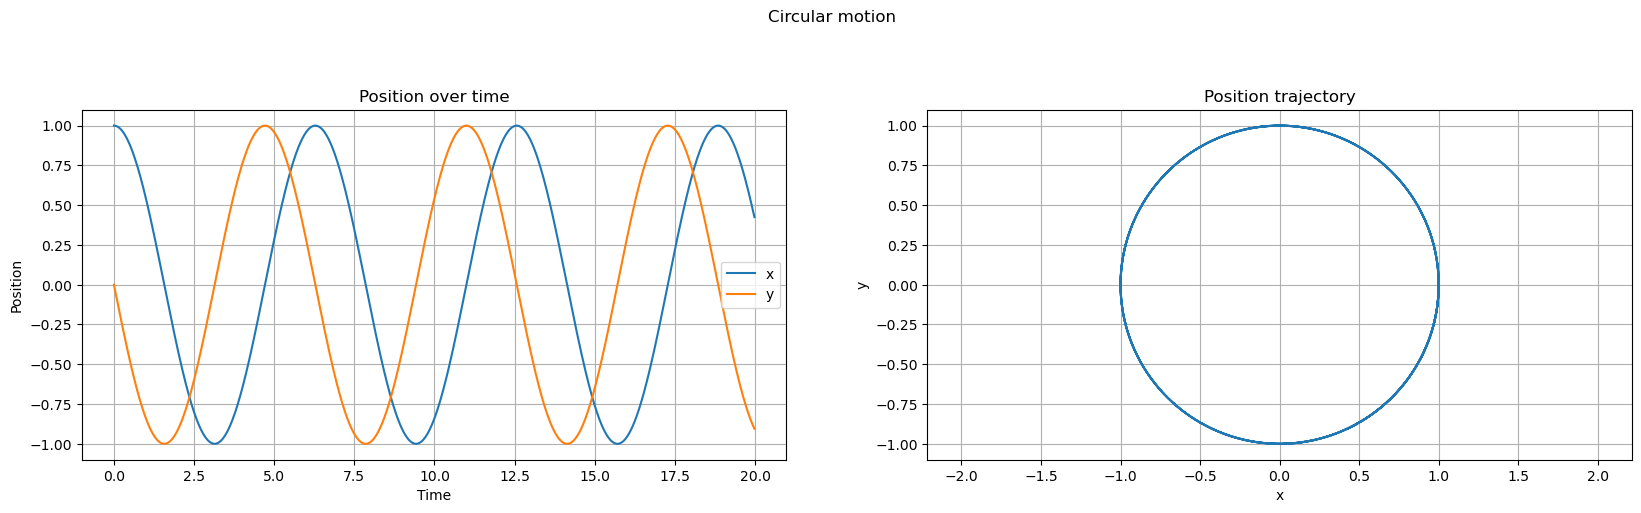

In [ ]:
plt.figure(figsize=(20, 10))
plt.suptitle('Circular motion')

plt.subplot(2, 2, 1)
plt.title('Position over time')
plt.xlabel('Time')
plt.ylabel('Position')
plt.plot(time, ss.T[0], label='x')
plt.plot(time, ss.T[1], label='y')
plt.grid()
plt.legend()

plt.subplot(2, 2, 2)
plt.title('Position trajectory')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(ss.T[0], ss.T[1])
plt.grid()
plt.axis('equal')


In [50]:
s_0 = np.array([1, 0, 0, 1])
ss = [s_0]

dt = 1/25
n_steps = 1000
time = np.arange(n_steps) * dt

# A = np.array([
#     [1 - (dt**2)/2, dt,         0,            0],
#     [-dt,          1 - (dt**2)/2, 0,            0],
#     [0,            0,          1 - (dt**2)/2,  dt],
#     [0,            0,          -dt,          1 - (dt**2)/2]
# ])
# B = np.zeros((4, 1))
# K = np.zeros((1, 4))

# Ad: Discrete
A = np.array([[1, 0, dt, 0],
               [0, 1, 0, dt],
               [0, 0, 1, 0],
               [0, 0, 0, 1]])
#Bd: Discrete
B = np.array([[dt**2, 0],
               [0, dt**2],
               [dt, 0],
               [0, dt]])
# K: Discrete
K = np.array([[1, 0, 0, 0],
               [0, 1, 0, 0]])

for i in range(n_steps-1):
    a = K @ ss[-1]
    s_ = A @ ss[-1] + B @ a
    ss.append(s_)

ss = np.array(ss)

(-5751607248779040.0,
 1.2078375222435986e+17,
 -5637725310244073.0,
 1.1839223151512554e+17)

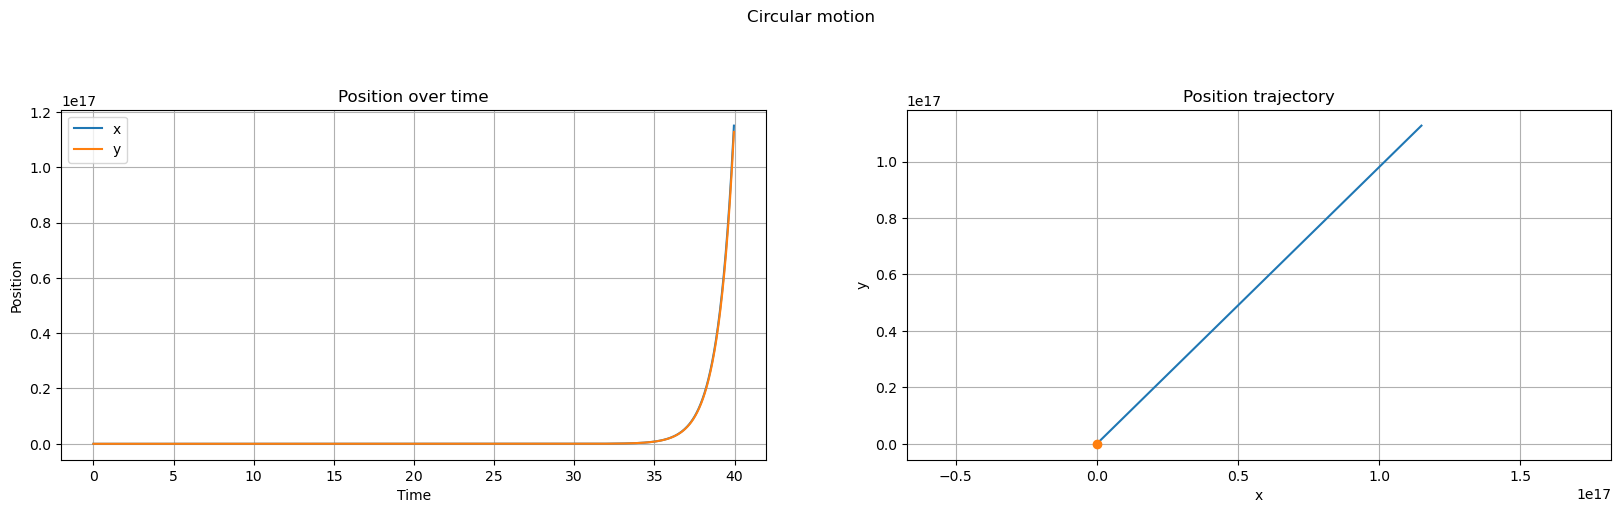

In [51]:
plt.figure(figsize=(20, 10))
plt.suptitle('Circular motion')

plt.subplot(2, 2, 1)
plt.title('Position over time')
plt.xlabel('Time')
plt.ylabel('Position')
plt.plot(time, ss.T[0], label='x')
plt.plot(time, ss.T[1], label='y')
plt.grid()
plt.legend()

plt.subplot(2, 2, 2)
plt.title('Position trajectory')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(ss.T[0], ss.T[1])
plt.plot(ss[0].T[0], ss[0].T[1], 'o', label='start')
plt.grid()
plt.axis('equal')


In [ ]:
s_0 = np.array([1, 0, 0, 1])
ss = [s_0]

dt = 1/25
n_steps = 1000
time = np.arange(n_steps) * dt

A = ...

B = ...

K = ...

for i in range(n_steps-1):
    a = K @ ss[-1]
    s_ = A @ ss[-1] + B @ a
    ss.append(s_)

ss = np.array(ss)

In [ ]:
plt.figure(figsize=(20, 10))
plt.suptitle('Circular motion')

plt.subplot(2, 2, 1)
plt.title('Position over time')
plt.xlabel('Time')
plt.ylabel('Position')
plt.plot(time, ss.T[0], label='x')
plt.plot(time, ss.T[1], label='y')
plt.grid()
plt.legend()

plt.subplot(2, 2, 2)
plt.title('Position trajectory')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(ss.T[0], ss.T[1])
plt.plot(ss[0].T[0], ss[0].T[1], 'o', label='start')
plt.grid()
plt.axis('equal')


In [ ]:

A = ...

B = ...

K = ...


M = A + B @ K
print(M)
print(np.linalg.det(M))

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Define matrices
A1 = np.array([
    [0.97, 0.02],
    [0.01, 0.98]
])

# Unstable system (one eigenvalue greater than 1)
A2 = np.array([
    [1.01, 0.03],
    [0.04, 0.96]
])

# Initial conditions
s_0_1 = np.array([1, 2])
s_0_2 = np.array([1, 2])

# Lists to store trajectories
ss_1 = [s_0_1]
ss_2 = [s_0_2]

# Simulation parameters
dt = 1/25
n_steps = 1000
time = np.arange(n_steps) * dt

# Simulate both systems
for i in range(n_steps-1):
    s_1 = A1 @ ss_1[-1]
    s_2 = A2 @ ss_2[-1]
    ss_1.append(s_1)
    ss_2.append(s_2)

# Convert lists to numpy arrays
ss_1 = np.array(ss_1)
ss_2 = np.array(ss_2)

(-54514102461.78126, 1144796151719.4065, -32199697214.95444, 676193641553.0526)

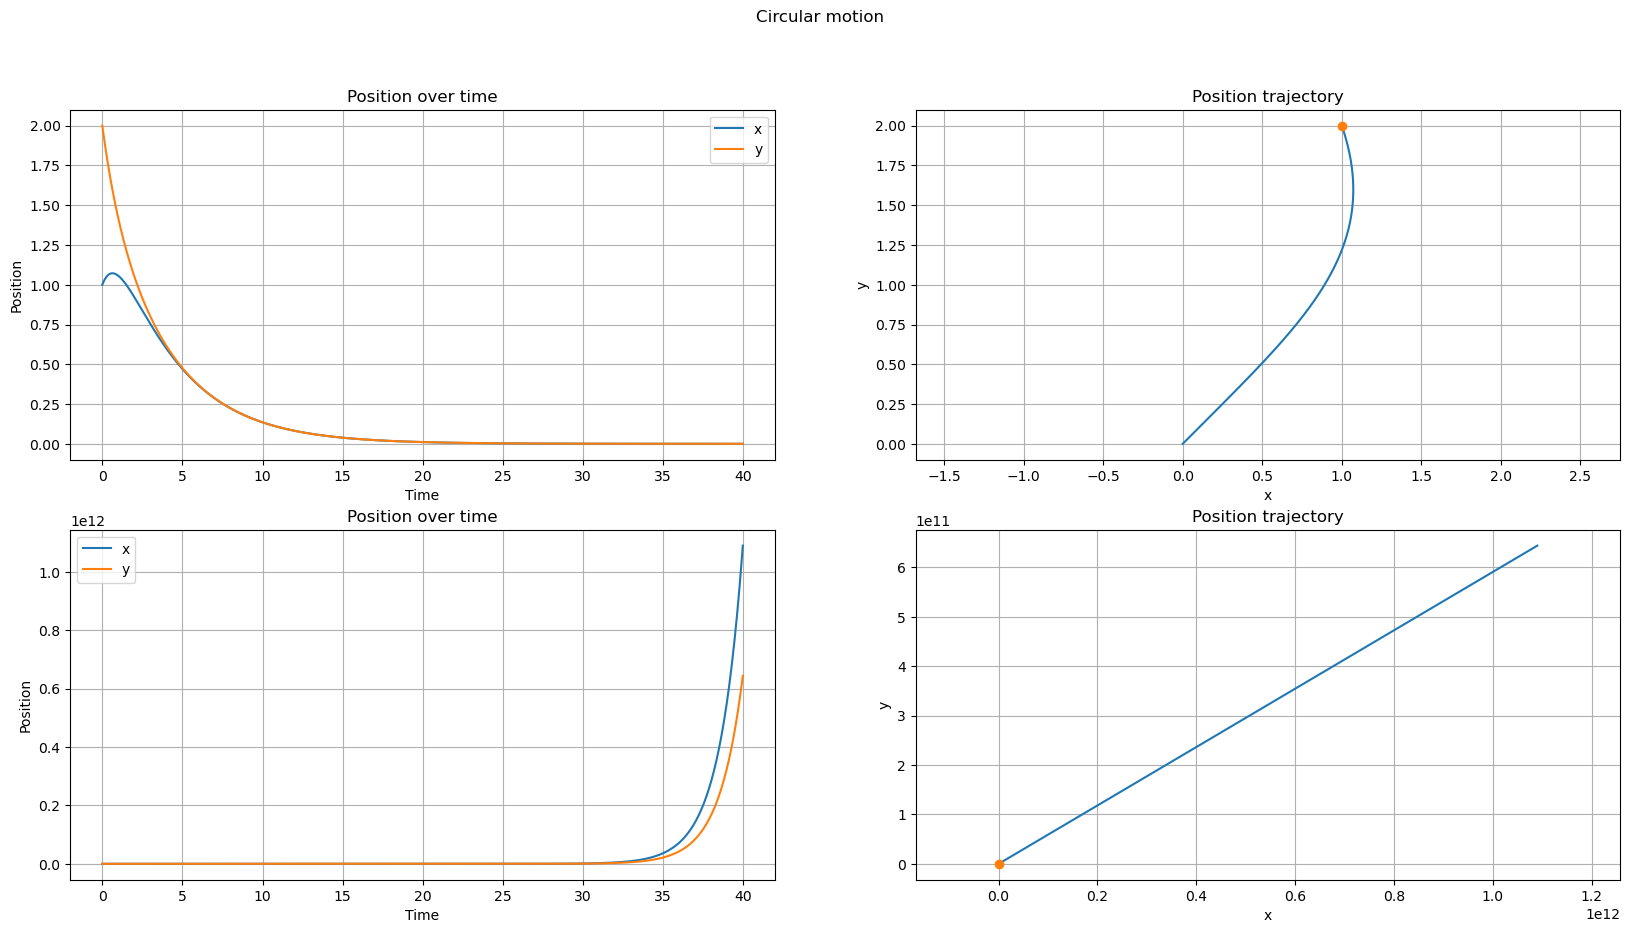

In [54]:
plt.figure(figsize=(20, 10))
plt.suptitle('Circular motion')

plt.subplot(2, 2, 1)
plt.title('Position over time')
plt.xlabel('Time')
plt.ylabel('Position')
plt.plot(time, ss_1.T[0], label='x')
plt.plot(time, ss_1.T[1], label='y')
plt.grid()
plt.legend()

plt.subplot(2, 2, 2)
plt.title('Position trajectory')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(ss_1.T[0], ss_1.T[1])
plt.plot(ss_1[0].T[0], ss_1[0].T[1], 'o', label='start')
plt.grid()
plt.axis('equal')

plt.subplot(2, 2, 3)
plt.title('Position over time')
plt.xlabel('Time')
plt.ylabel('Position')
plt.plot(time, ss_2.T[0], label='x')
plt.plot(time, ss_2.T[1], label='y')
plt.grid()
plt.legend()

plt.subplot(2, 2, 4)
plt.title('Position trajectory')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(ss_2.T[0], ss_2.T[1])
plt.plot(ss_2[0].T[0], ss_2[0].T[1], 'o', label='start')
plt.grid()
plt.axis('equal')


# Linear Dynamical Systems: Behavior Based on Eigenvalues and Determinants

Linear dynamical systems of the form $x_{t+1} = A x_t$ are fundamental in many fields including control theory, economics, and physics. The behavior of these systems is largely determined by the eigenvalues and determinant of the matrix $A$.

## Eigenvalues and System Behavior

The eigenvalues $\lambda_i$ of matrix $A$ directly determine the long-term behavior of the system:

### Case 1: All $|\lambda_i| < 1$
- **Behavior**: The system is stable and converges to the origin (0)
- **Trajectory**: All trajectories approach zero as $t \rightarrow \infty$
- **Physical interpretation**: The system is dissipative and loses energy over time

### Case 2: All $|\lambda_i| = 1$
- **Behavior**: The system is marginally stable
- **Trajectory**: Trajectories remain bounded but don't converge to zero
- **Special case**: If $\lambda_i$ are complex with magnitude 1, the system exhibits oscillatory behavior

### Case 3: Any $|\lambda_i| > 1$
- **Behavior**: The system is unstable
- **Trajectory**: At least some trajectories grow unbounded as $t \rightarrow \infty$
- **Physical interpretation**: The system amplifies perturbations over time

## The Role of the Determinant

The determinant provides additional insights into system behavior:

### $\det(A) = 0$
- The system is singular
- At least one eigenvalue is zero
- The system maps the state space onto a lower-dimensional subspace
- Some initial states will immediately collapse to lower dimensions

### $0 < |\det(A)| < 1$
- The system is contractive
- The volume in state space shrinks with each iteration
- All trajectories eventually converge to a lower-dimensional attractor

### $|\det(A)| = 1$
- The system preserves volume in state space
- Often associated with conservative physical systems
- Examples include rotations and reflections

### $|\det(A)| > 1$
- The system is expansive
- The volume in state space grows with each iteration
- Associated with unstable, divergent behavior

## Special Cases and Their Behavior

### Jordan Blocks
When $A$ has repeated eigenvalues with deficient eigenvectors, the system exhibits polynomial growth multiplied by exponential terms.

### Nilpotent Matrices
When all eigenvalues are zero, the system reaches the origin in finite time.

### Companion Matrices
These represent higher-order difference equations and their behavior is determined by the roots of the characteristic polynomial.

## Phase Portraits for 2D Systems

For 2D systems, the eigenvalues classify the fixed point at the origin:

- **Stable node**: Real eigenvalues, both $|\lambda_i| < 1$
- **Unstable node**: Real eigenvalues, both $|\lambda_i| > 1$
- **Saddle point**: Real eigenvalues with opposite stability ($|\lambda_1| < 1 < |\lambda_2|$)
- **Stable focus**: Complex conjugate eigenvalues with $|\lambda_i| < 1$
- **Unstable focus**: Complex conjugate eigenvalues with $|\lambda_i| > 1$
- **Center**: Complex conjugate eigenvalues with $|\lambda_i| = 1$

The determinant and trace provide a quick way to classify these behaviors:
- $\det(A) = \lambda_1 \lambda_2$
- $\text{tr}(A) = \lambda_1 + \lambda_2$

## Connection to Energy

The concept of energy provides a powerful framework for understanding dynamical systems:

### Energy and Eigenvalues

1. **Dissipative Systems** ($|\lambda_i| < 1$)
   - Energy decreases with each time step
   - Can be modeled with a Lyapunov function $V(x)$ where $V(x_{t+1}) < V(x_t)$
   - Examples: Damped oscillators, heat diffusion

2. **Conservative Systems** ($|\lambda_i| = 1$)
   - Energy remains constant over time
   - The system preserves some quantity (often mechanical energy)
   - Examples: Ideal pendulum, frictionless mechanical systems

3. **Energetically Unstable Systems** ($|\lambda_i| > 1$)
   - Energy increases with time
   - Requires external energy input to maintain
   - Examples: Amplifiers, population growth models

### Energy Interpretation of the Determinant

The determinant of $A$ relates to the volume transformation in state space, which has a direct energy interpretation:

- $|\det(A)| < 1$: The system dissipates energy to the environment
- $|\det(A)| = 1$: The system conserves energy (Hamiltonian systems)
- $|\det(A)| > 1$: The system absorbs energy from external sources

### Quadratic Forms and Energy Functions

For many physical systems, energy can be represented as a quadratic form:

$$E(x) = x^T P x$$

Where $P$ is a positive definite matrix. For discrete systems:

- If $A^T P A - P < 0$ (negative definite), the system loses energy (stable)
- If $A^T P A - P = 0$, the system conserves energy (marginally stable)
- If $A^T P A - P > 0$ (positive definite), the system gains energy (unstable)

### Entropy Interpretation

The determinant and eigenvalues also relate to entropy production:

- $|\det(A)| < 1$: The system produces entropy (irreversible processes)
- $|\det(A)| = 1$: The system preserves entropy (reversible processes)
- $|\det(A)| > 1$: The system decreases entropy (requires external work)

This provides a thermodynamic interpretation of linear dynamical systems, connecting mathematical properties to physical reality.

# Pendulum Equation

The equation of motion for a simple mathematical pendulum can be represented as:

$$\ddot{\theta} + \frac{g}{l}\sin\theta = 0$$

where:
- $\theta$ — angle of displacement from the vertical position
- $\ddot{\theta}$ — second derivative of $\theta$ with respect to time (acceleration)
- $g$ — acceleration due to gravity
- $l$ — length of the pendulum

For small angles of displacement ($\sin\theta \approx \theta$), the equation can be simplified to a linear form:

$$\ddot{\theta} + \frac{g}{l}\theta = 0$$

This is a second-order linear differential equation, with the solution being a harmonic oscillation with period:

$$T = 2\pi\sqrt{\frac{l}{g}}$$

The frequency of oscillation is given by:

$$f = \frac{1}{T} = \frac{1}{2\pi}\sqrt{\frac{g}{l}}$$

And the angular frequency (also known as the natural frequency) is:

$$\omega = 2\pi f = \sqrt{\frac{g}{l}}$$

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Initial conditions
theta0 = np.pi/4  # Initial angle (radians)
omega0 = 0.0      # Initial angular velocity (rad/s)

# Time parameters
n_steps = 1000
dt = 1/50
time = np.arange(n_steps) * dt

# Initialize arrays
thetas = [theta0]  # Angle
omegas = [omega0]  # Angular velocity
alphas = [0]       # Angular acceleration

# Position of the pendulum bob
poss = [np.array([np.sin(theta0), -np.cos(theta0)])]
vels = [np.array([omega0 * np.cos(theta0), omega0 * np.sin(theta0)])]
accs = [np.array([-np.sin(theta0), -np.cos(theta0)])]

# Run simulation
for i in range(n_steps-1):
    # Calculate angular acceleration (from the simplified equation: θ̈ + sinθ = 0)
    alpha = -np.sin(thetas[-1])
    alphas.append(alpha)
    
    # Update angular velocity
    omega = omegas[-1] + alphas[-1] * dt
    omegas.append(omega)
    
    # Update angle
    theta = thetas[-1] + omegas[-1] * dt
    thetas.append(theta)
    
    # Calculate x,y position of the pendulum bob
    pos = np.array([np.sin(theta), -np.cos(theta)])
    poss.append(pos)
    
    # Calculate velocity (derivative of position)
    vel = np.array([omega * np.cos(theta), omega * np.sin(theta)])
    vels.append(vel)
    
    # Calculate acceleration
    acc = np.array([-np.sin(theta), -np.cos(theta)])
    accs.append(acc)

# Convert lists to numpy arrays
thetas = np.array(thetas)
omegas = np.array(omegas)
alphas = np.array(alphas)
poss = np.array(poss)
vels = np.array(vels)
accs = np.array(accs)


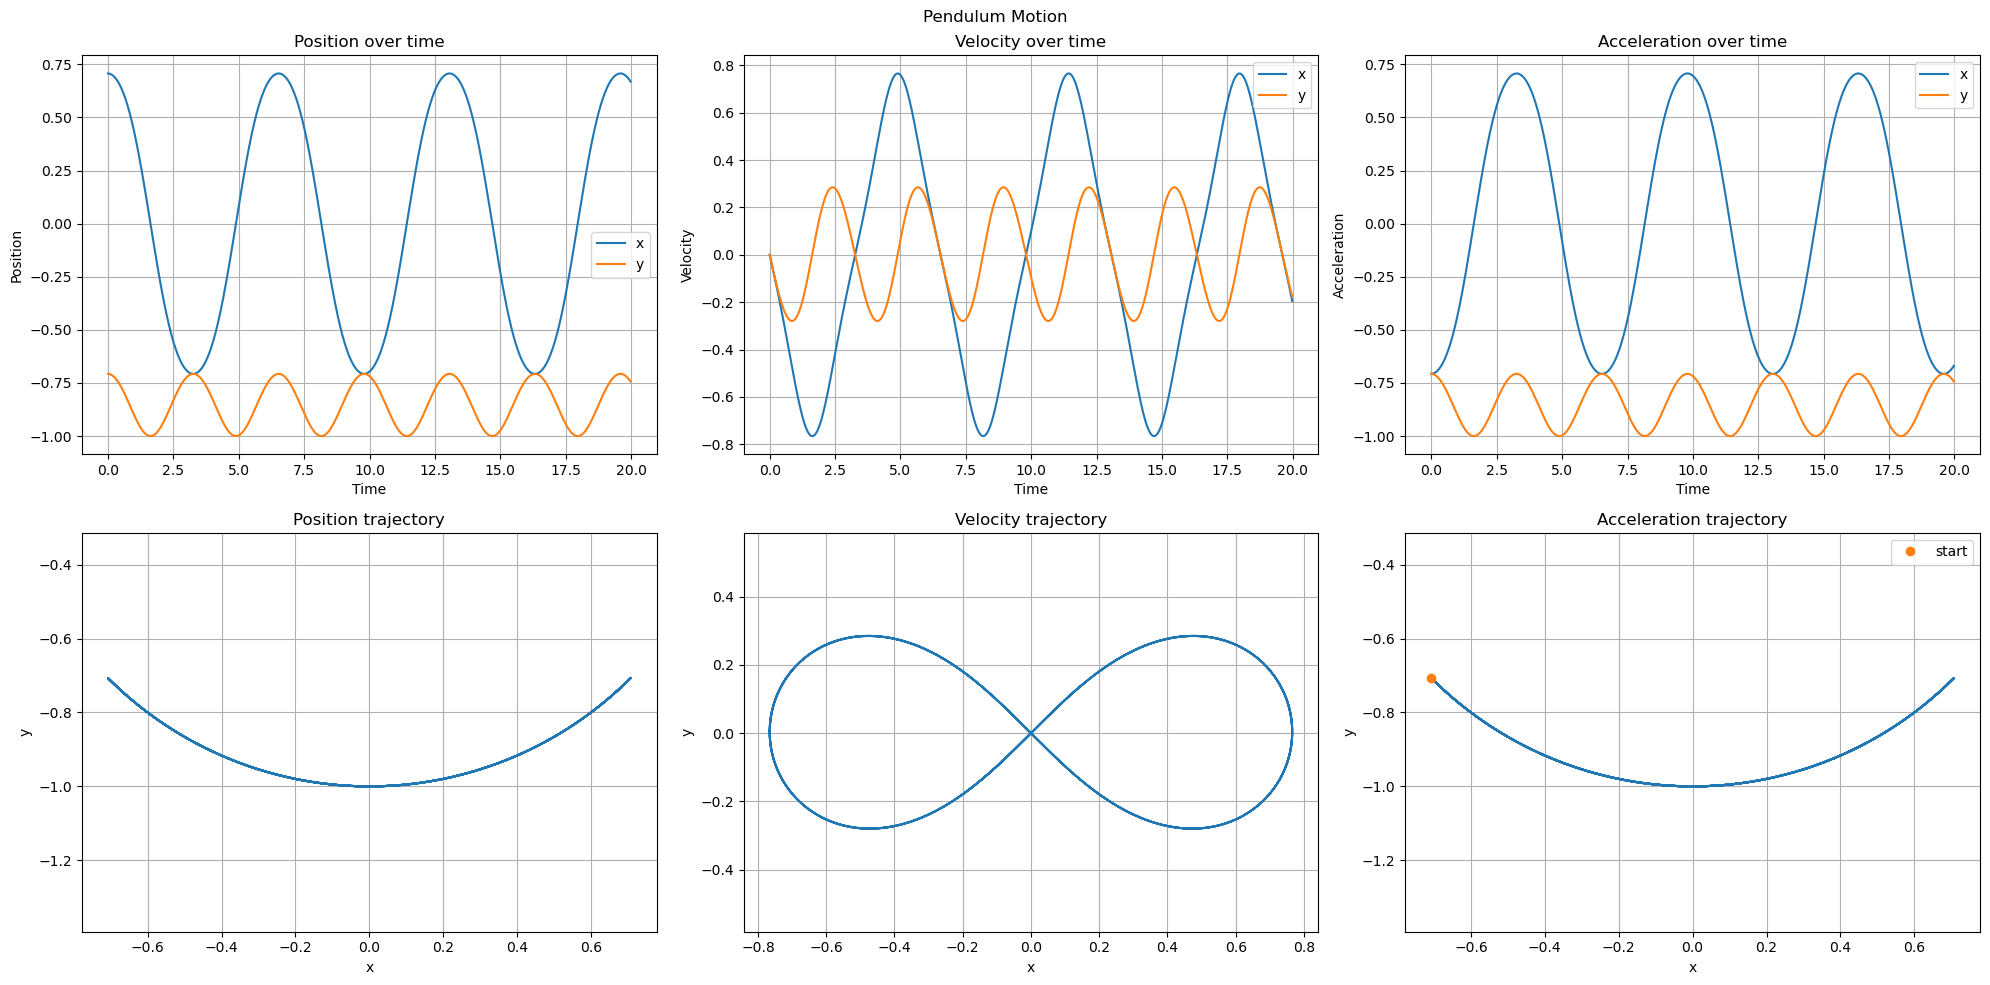

In [59]:

# Plotting
plt.figure(figsize=(20, 10))
plt.suptitle('Pendulum Motion')

plt.subplot(2, 3, 1)
plt.title('Position over time')
plt.xlabel('Time')
plt.ylabel('Position')
plt.plot(time, poss.T[0], label='x')
plt.plot(time, poss.T[1], label='y')
plt.grid()
plt.legend()

plt.subplot(2, 3, 2)
plt.title('Velocity over time')
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.plot(time, vels.T[0], label='x')
plt.plot(time, vels.T[1], label='y')
plt.grid()
plt.legend()

plt.subplot(2, 3, 3)
plt.title('Acceleration over time')
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.plot(time, accs.T[0], label='x')
plt.plot(time, accs.T[1], label='y')
plt.grid()
plt.legend()

plt.subplot(2, 3, 4)
plt.title('Position trajectory')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(poss.T[0], poss.T[1])
plt.grid()
plt.axis('equal')

plt.subplot(2, 3, 5)   
plt.title('Velocity trajectory')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(vels.T[0], vels.T[1])
plt.grid()
plt.axis('equal')

plt.subplot(2, 3, 6)
plt.title('Acceleration trajectory')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(accs.T[0], accs.T[1])
plt.plot(accs.T[0][0], accs.T[1][0], 'o', label='start')
plt.grid()
plt.axis('equal')
plt.legend()

plt.tight_layout()
plt.show()

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Initial conditions
theta0 = np.pi/4  # Initial angle (radians)
omega0 = 0.0      # Initial angular velocity (rad/s)

# Time parameters
n_steps = 1000
dt = 1/50
time = np.arange(n_steps) * dt

# Initialize arrays - using phase space variables directly
thetas = [theta0]  # Position in phase space (angle)
omegas = [omega0]  # Momentum in phase space (angular velocity)

# Run simulation
for i in range(n_steps-1):
    # Calculate angular acceleration (from the simplified equation: θ̈ + sinθ = 0)
    alpha = -np.sin(thetas[-1])
    
    # Update angular velocity (phase space momentum)
    omega = omegas[-1] + alpha * dt
    omegas.append(omega)
    
    # Update angle (phase space position)
    theta = thetas[-1] + omega * dt
    thetas.append(theta)

# Convert lists to numpy arrays
thetas = np.array(thetas)
omegas = np.array(omegas)


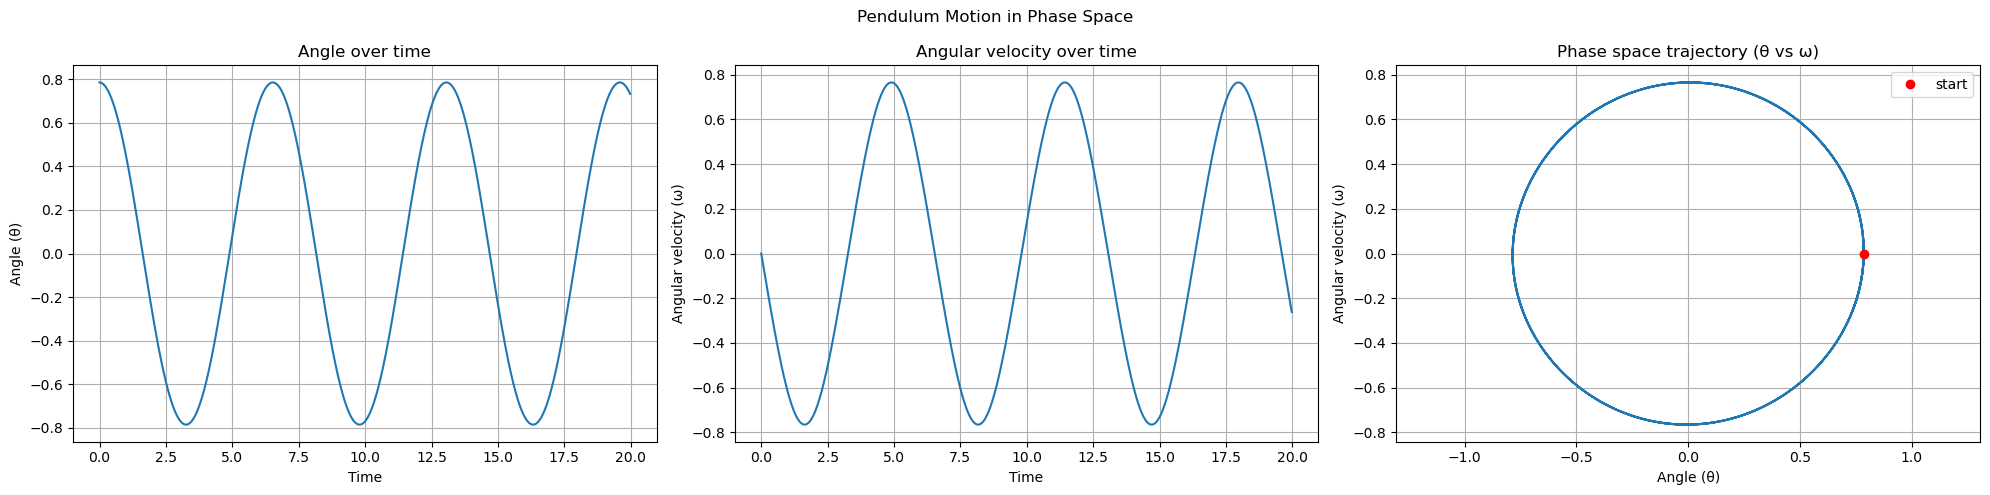

In [61]:

# Plotting
plt.figure(figsize=(20, 5))
plt.suptitle('Pendulum Motion in Phase Space')

plt.subplot(1, 3, 1)
plt.title('Angle over time')
plt.xlabel('Time')
plt.ylabel('Angle (θ)')
plt.plot(time, thetas)
plt.grid()

plt.subplot(1, 3, 2)
plt.title('Angular velocity over time')
plt.xlabel('Time')
plt.ylabel('Angular velocity (ω)')
plt.plot(time, omegas)
plt.grid()

plt.subplot(1, 3, 3)
plt.title('Phase space trajectory (θ vs ω)')
plt.xlabel('Angle (θ)')
plt.ylabel('Angular velocity (ω)')
plt.plot(thetas, omegas)
plt.plot(thetas[0], omegas[0], 'ro', label='start')
plt.grid()
plt.axis('equal')
plt.legend()

plt.tight_layout()
plt.show()


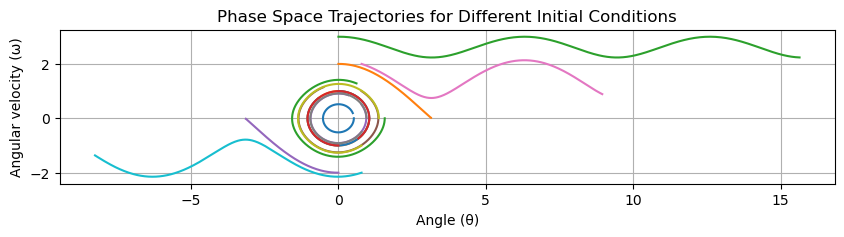

In [62]:

# Multiple initial conditions to see different trajectories
plt.figure(figsize=(10, 2))
plt.title('Phase Space Trajectories for Different Initial Conditions')
plt.xlabel('Angle (θ)')
plt.ylabel('Angular velocity (ω)')

# Various starting conditions
initial_conditions = [
    (np.pi/6, 0),      # Small angle, no initial velocity
    (np.pi/3, 0),      # Medium angle, no initial velocity
    (np.pi/2, 0),      # Large angle, no initial velocity
    (np.pi, 0),        # Maximum angle, no initial velocity
    (np.pi/4, 0.5),    # Medium angle, small positive velocity
    (np.pi/4, 1.0),    # Medium angle, medium positive velocity
    (np.pi/4, 2.0),    # Medium angle, large positive velocity
    (np.pi/4, -0.5),   # Medium angle, small negative velocity
    (np.pi/4, -1.0),   # Medium angle, medium negative velocity
    (np.pi/4, -2.0),   # Medium angle, large negative velocity
    (0, 1.0),          # No angle, medium velocity
    (0, 2.0),          # No angle, large velocity
    (0, 3.0),          # No angle, very large velocity
    (0, -1.0),         # No angle, medium negative velocity
    (0, -2.0),         # No angle, large negative velocity
]

for theta0, omega0 in initial_conditions:
    # Reset arrays
    thetas = [theta0]
    omegas = [omega0]
    
    # Run simulation for this initial condition
    for i in range(300):
        alpha = -np.sin(thetas[-1])
        omega = omegas[-1] + alpha * dt
        omegas.append(omega)
        
        theta = thetas[-1] + omega * dt
        thetas.append(theta)
    
    # Plot this trajectory
    thetas = np.array(thetas)
    omegas = np.array(omegas)
    plt.plot(thetas, omegas, label=f'θ₀={theta0:.2f}, ω₀={omega0:.2f}')

plt.grid()
# plt.legend()
plt.show()

In [68]:
import numpy as np
import matplotlib.pyplot as plt

# Initial conditions
theta0 = np.pi/4  # Initial angle (radians)
omega0 = 0.0      # Initial angular velocity (rad/s)

# Time parameters
n_steps = 1000
dt = 1/50
time = np.arange(n_steps) * dt

# Initialize arrays
s = np.zeros((n_steps, 2))
s[0] = [theta0, omega0]  # s = [θ, θ̇]

# System matrices (linearized model)
A = np.array([[1, dt],
              [-dt, 1]])

B = np.array([[0],
              [dt]])

# Feedback gain matrix (can be tuned)
K = np.array([[1, 0]])

# Closed-loop system simulation
for i in range(n_steps-1):
   # Calculate control input a = -K·s
   a = -K @ s[i]
   
   # Update state: s[k+1] = (I + dt·A)·s[k] + dt·B·a[k]
   s[i+1] = A @ s[i] + B @ a

# Extract angle and angular velocity for plotting
thetas_controlled = s[:, 0]
omegas_controlled = s[:, 1]

# Comparison with original uncontrolled system
thetas_uncontrolled = [theta0]
omegas_uncontrolled = [omega0]

for i in range(n_steps-1):
   # Angular acceleration without control
   alpha = -np.sin(thetas_uncontrolled[-1])
   
   # Update angular velocity
   omega = omegas_uncontrolled[-1] + alpha * dt
   omegas_uncontrolled.append(omega)
   
   # Update angle
   theta = thetas_uncontrolled[-1] + omega * dt
   thetas_uncontrolled.append(theta)

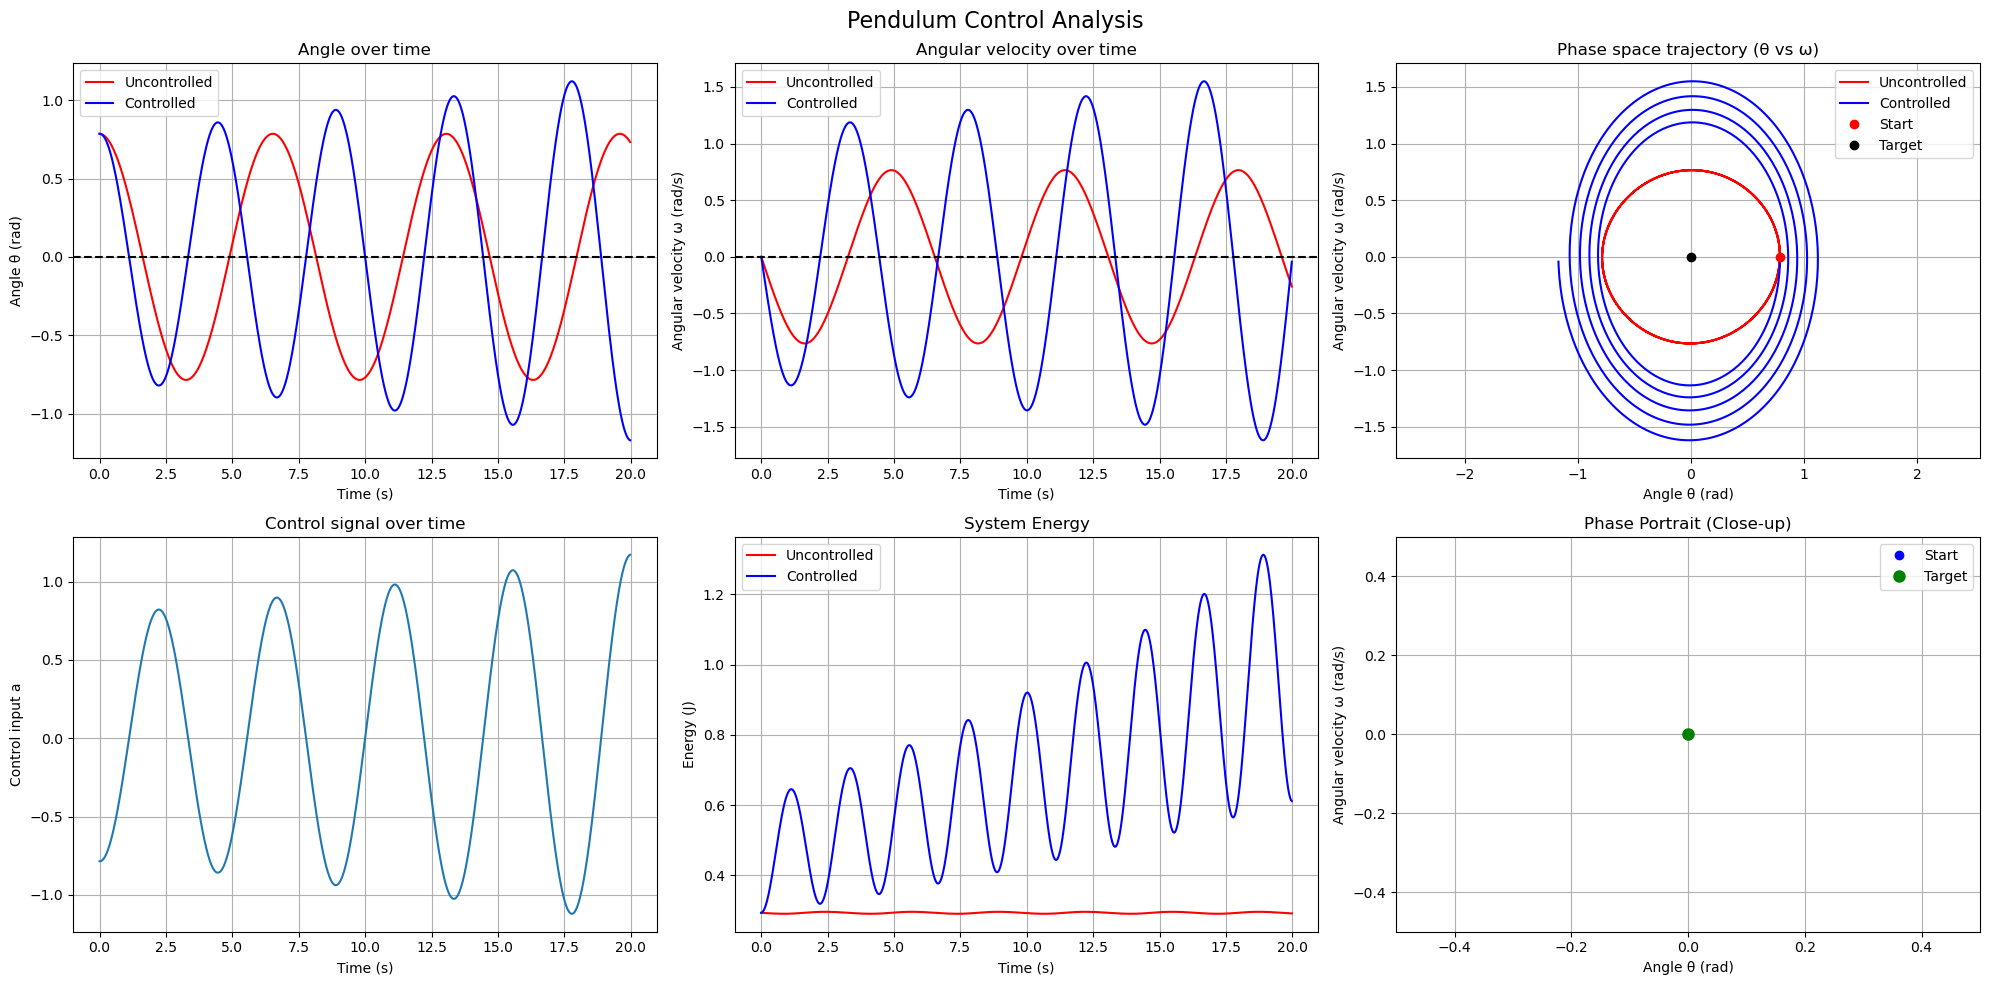

In [69]:
# Plotting the results of pendulum control simulation
plt.figure(figsize=(20, 10))
plt.suptitle('Pendulum Control Analysis', fontsize=16)

# Angle over time - comparing controlled vs uncontrolled pendulum
plt.subplot(2, 3, 1)
plt.title('Angle over time')
plt.xlabel('Time (s)')
plt.ylabel('Angle θ (rad)')
plt.plot(time, thetas_uncontrolled, 'r-', label='Uncontrolled')
plt.plot(time, thetas_controlled, 'b-', label='Controlled')
plt.axhline(y=0, color='k', linestyle='--')  # Target position
plt.grid()
plt.legend()

# Angular velocity over time
plt.subplot(2, 3, 2)
plt.title('Angular velocity over time')
plt.xlabel('Time (s)')
plt.ylabel('Angular velocity ω (rad/s)')
plt.plot(time, omegas_uncontrolled, 'r-', label='Uncontrolled')
plt.plot(time, omegas_controlled, 'b-', label='Controlled')
plt.axhline(y=0, color='k', linestyle='--')  # Target velocity
plt.grid()
plt.legend()

# Phase space trajectories
plt.subplot(2, 3, 3)
plt.title('Phase space trajectory (θ vs ω)')
plt.xlabel('Angle θ (rad)')
plt.ylabel('Angular velocity ω (rad/s)')
plt.plot(thetas_uncontrolled, omegas_uncontrolled, 'r-', label='Uncontrolled')
plt.plot(thetas_controlled, omegas_controlled, 'b-', label='Controlled')
plt.plot(thetas_uncontrolled[0], omegas_uncontrolled[0], 'ro', label='Start')
plt.plot(0, 0, 'ko', label='Target')  # Equilibrium point
plt.grid()
plt.axis('equal')
plt.legend()

# Control signal applied to stabilize the pendulum
plt.subplot(2, 3, 4)
plt.title('Control signal over time')
plt.xlabel('Time (s)')
plt.ylabel('Control input a')
# Calculate control signals for the entire simulation
a_history = [-K @ s[i] for i in range(n_steps)]
plt.plot(time, a_history)
plt.grid()

# System energy - shows how the controller dissipates energy
# Convert lists to numpy arrays if they aren't already
thetas_controlled_np = np.array(thetas_controlled)
omegas_controlled_np = np.array(omegas_controlled)
thetas_uncontrolled_np = np.array(thetas_uncontrolled)
omegas_uncontrolled_np = np.array(omegas_uncontrolled)

# Calculate energy (kinetic + potential)
E_controlled = 0.5 * omegas_controlled_np**2 + (1 - np.cos(thetas_controlled_np))
E_uncontrolled = 0.5 * omegas_uncontrolled_np**2 + (1 - np.cos(thetas_uncontrolled_np))

plt.subplot(2, 3, 5)
plt.title('System Energy')
plt.xlabel('Time (s)')
plt.ylabel('Energy (J)')
plt.plot(time, E_uncontrolled, 'r-', label='Uncontrolled')
plt.plot(time, E_controlled, 'b-', label='Controlled')
plt.grid()
plt.legend()

# Close-up view of the phase portrait near the target point
plt.subplot(2, 3, 6)
plt.title('Phase Portrait (Close-up)')
plt.xlabel('Angle θ (rad)')
plt.ylabel('Angular velocity ω (rad/s)')
plt.plot(thetas_controlled, omegas_controlled, 'b-')
plt.plot(thetas_controlled[0], omegas_controlled[0], 'bo', label='Start')
plt.plot(0, 0, 'go', markersize=8, label='Target')
# Set smaller range for a detailed view
plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5)
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

# Mathematical Analysis of a Pendulum Control System

## 1. System Description

We are analyzing a simple pendulum system with feedback control. The pendulum consists of a mass attached to a fixed point by a massless rod, moving in a vertical plane under the influence of gravity.

## 2. Equations of Motion

### 2.1 Standard Form

The equation of motion for a simple pendulum without control is:

$$ml^2 \ddot{\theta} + mgl\sin\theta = 0$$

where:
- $m$ is the mass
- $l$ is the length of the pendulum
- $g$ is the gravitational acceleration
- $\theta$ is the angle from the vertical

For simplification, we can normalize the constants ($ml^2 = 1$ and $mgl = 1$), giving:

$$\ddot{\theta} + \sin\theta = 0$$

When adding a control input $u$, the equation becomes:

$\ddot{\theta} + \sin\theta = a$

### 2.2 Matrix Form (State Space Representation)

Let's define the state vector $\mathbf{s} = \begin{bmatrix} \theta \\ \dot{\theta} \end{bmatrix}$, where:
- $s_1 = \theta$ (angle)
- $s_2 = \dot{\theta}$ (angular velocity)

The state space representation of the nonlinear pendulum system is:

$\dot{\mathbf{s}} = \begin{bmatrix} \dot{s}_1 \\ \dot{s}_2 \end{bmatrix} = \begin{bmatrix} s_2 \\ -\sin(s_1) + a \end{bmatrix}$

Or in the standard form $\dot{\mathbf{s}} = f(\mathbf{s}, u)$:

$\dot{\mathbf{s}} = \begin{bmatrix} s_2 \\ -\sin(s_1) \end{bmatrix} + \begin{bmatrix} 0 \\ 1 \end{bmatrix} a$

## 3. Linearization

For small angles, $\sin\theta \approx \theta$, so the linearized pendulum equation is:

$\ddot{\theta} + \theta = a$

### 3.1 Linearized State Space Model

The linearized state space model is:

$\dot{\mathbf{s}} = \mathbf{A}\mathbf{s} + \mathbf{B}a$

where:

$$\mathbf{A} = \begin{bmatrix} 0 & 1 \\ -1 & 0 \end{bmatrix} \quad \text{and} \quad \mathbf{B} = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$$

This corresponds to:

$\begin{bmatrix} \dot{\theta} \\ \ddot{\theta} \end{bmatrix} = \begin{bmatrix} 0 & 1 \\ -1 & 0 \end{bmatrix} \begin{bmatrix} \theta \\ \dot{\theta} \end{bmatrix} + \begin{bmatrix} 0 \\ 1 \end{bmatrix} a$

## 4. Control System Design

### 4.1 State Feedback Control

We implement a state feedback control law:

$a = -\mathbf{K}\mathbf{s}$

where $\mathbf{K} = \begin{bmatrix} k_1 & k_2 \end{bmatrix}$ is the feedback gain matrix.

### 4.2 Closed-Loop System with General Coefficients

Substituting the control law into the linearized system:

$\dot{\mathbf{s}} = \mathbf{A}\mathbf{s} + \mathbf{B}a = \mathbf{A}\mathbf{s} - \mathbf{B}\mathbf{K}\mathbf{s} = (\mathbf{A} - \mathbf{B}\mathbf{K})\mathbf{s}$

The closed-loop system matrix becomes:

$$\mathbf{A}_{cl} = \mathbf{A} - \mathbf{B}\mathbf{K} = \begin{bmatrix} 0 & 1 \\ -1 & 0 \end{bmatrix} - \begin{bmatrix} 0 \\ 1 \end{bmatrix} \begin{bmatrix} k_1 & k_2 \end{bmatrix} = \begin{bmatrix} 0 & 1 \\ -1-k_1 & -k_2 \end{bmatrix}$$

### 4.3 Closed-Loop System with K = [1, 1]

With $\mathbf{K} = \begin{bmatrix} 1 & 1 \end{bmatrix}$, the closed-loop system matrix is:

$$\mathbf{A}_{cl} = \begin{bmatrix} 0 & 1 \\ -2 & -1 \end{bmatrix}$$

And the closed-loop system dynamics are:

$$\dot{\mathbf{s}} = \begin{bmatrix} 0 & 1 \\ -2 & -1 \end{bmatrix} \mathbf{s}$$

## 5. Energy Analysis

### 5.1 Energy Formula

The total energy of the pendulum system consists of kinetic and potential energy:

$$E = T + V = \frac{1}{2}ml^2\dot{\theta}^2 + mgl(1-\cos\theta)$$

Where:
- $T = \frac{1}{2}ml^2\dot{\theta}^2$ is the kinetic energy
- $V = mgl(1-\cos\theta)$ is the potential energy

Using our normalized constants:

$$E = \frac{1}{2}\dot{\theta}^2 + (1-\cos\theta)$$

### 5.2 Energy in Matrix Form

Using the state vector $\mathbf{s} = \begin{bmatrix} \theta \\ \dot{\theta} \end{bmatrix}$, we can express the energy as:

$$E = \frac{1}{2}s_2^2 + (1-\cos(s_1))$$

For small angles (linearized system), using $\cos\theta \approx 1 - \frac{\theta^2}{2}$:

$$E \approx \frac{1}{2}s_2^2 + \frac{1}{2}s_1^2 = \frac{1}{2}\mathbf{s}^T\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}\mathbf{s}$$

This quadratic form shows that the energy is positive definite, which is important for stability analysis.

## 6. Analysis of the State Transition Matrix

### 6.1 Discrete State Transition Matrix

In the numerical simulation, we use a discrete approximation with time step $dt$. The discrete update equation from your code is:

$\mathbf{s}_{k+1} = \mathbf{s}_k + dt \cdot (\mathbf{A} \cdot \mathbf{s}_k + \mathbf{B} \cdot a_k)$

This can be rewritten as:

$\mathbf{s}_{k+1} = (\mathbf{I} + dt \cdot \mathbf{A}) \cdot \mathbf{s}_k + dt \cdot \mathbf{B} \cdot a_k$

Where the discrete state transition matrix is:

$\mathbf{A}_d = (\mathbf{I} + dt \cdot \mathbf{A}) = \begin{bmatrix} 1 & dt \\ -dt & 1 \end{bmatrix}$

And the discrete input matrix is:

$\mathbf{B}_d = dt \cdot \mathbf{B} = \begin{bmatrix} 0 \\ dt \end{bmatrix}$

For the closed-loop system with $a = -\mathbf{K}\mathbf{s}$, the discrete dynamics become:

$\mathbf{s}_{k+1} = (\mathbf{I} + dt \cdot \mathbf{A} - dt \cdot \mathbf{B}\mathbf{K}) \cdot \mathbf{s}_k$

With $\mathbf{K} = \begin{bmatrix} 1 & 1 \end{bmatrix}$, the closed-loop discrete transition matrix is:

$\mathbf{A}_{d,cl} = \begin{bmatrix} 1 & dt \\ -dt-dt \cdot k_1 & 1-dt \cdot k_2 \end{bmatrix} = \begin{bmatrix} 1 & dt \\ -dt-dt & 1-dt \end{bmatrix} = \begin{bmatrix} 1 & dt \\ -2dt & 1-dt \end{bmatrix}$

#### Eigenvalues of the Discrete Transition Matrix

The eigenvalues of $\mathbf{A}_{d,cl}$ are found by solving:

$\det(\mathbf{A}_{d,cl} - \lambda\mathbf{I}) = 0$

$\det\begin{pmatrix} 1-\lambda & dt \\ -2dt & 1-dt-\lambda \end{pmatrix} = 0$

$(1-\lambda)(1-dt-\lambda) - dt(-2dt) = 0$

$(1-\lambda)(1-dt-\lambda) + 2dt^2 = 0$

$\lambda^2 - (2-dt)\lambda + (1-dt+2dt^2) = 0$

For system stability in discrete form, all eigenvalues must lie inside the unit circle (have magnitude less than 1).

#### Determinant of the Discrete Transition Matrix

The determinant of $\mathbf{A}_{d,cl}$ is:

$\det(\mathbf{A}_{d,cl}) = (1) \cdot (1-dt) - dt \cdot (-2dt) = 1-dt+2dt^2$

For small $dt$, this value approaches 1. The determinant of the discrete transition matrix relates to volume preservation in phase space. A value less than 1 indicates phase volume contraction, which is characteristic of dissipative systems.

### 6.2 Eigenvalues of the Open-Loop System

The eigenvalues of matrix $\mathbf{A}$ are found by solving:

$$\det(\mathbf{A} - \lambda\mathbf{I}) = 0$$

$$\det\begin{pmatrix} -\lambda & 1 \\ -1 & -\lambda \end{pmatrix} = 0$$

$$\lambda^2 + 1 = 0$$

$$\lambda = \pm i$$

The eigenvalues are $\lambda_1 = i$ and $\lambda_2 = -i$, which are purely imaginary. This indicates that the uncontrolled linearized system is marginally stable, exhibiting undamped oscillations.

### 6.2 Eigenvalues of the Closed-Loop System

For the closed-loop system with $\mathbf{K} = \begin{bmatrix} 1 & 1 \end{bmatrix}$, the eigenvalues of $\mathbf{A}_{cl}$ are:

$$\det(\mathbf{A}_{cl} - \lambda\mathbf{I}) = 0$$

$$\det\begin{pmatrix} -\lambda & 1 \\ -2 & -1-\lambda \end{pmatrix} = 0$$

$$\lambda^2 + \lambda + 2 = 0$$

Using the quadratic formula:

$$\lambda = \frac{-1 \pm \sqrt{1 - 8}}{2} = \frac{-1 \pm \sqrt{-7}}{2} = \frac{-1 \pm i\sqrt{7}}{2}$$

So $\lambda_1 = \frac{-1 + i\sqrt{7}}{2}$ and $\lambda_2 = \frac{-1 - i\sqrt{7}}{2}$.

These eigenvalues have negative real parts, indicating that the closed-loop system is asymptotically stable.

### 6.3 Determinant Analysis and Phase Space Volume

The determinant of the open-loop matrix $\mathbf{A}$ is:

$\det(\mathbf{A}) = \det\begin{pmatrix} 0 & 1 \\ -1 & 0 \end{pmatrix} = 0 \cdot 0 - 1 \cdot (-1) = 1$

The determinant of the closed-loop matrix $\mathbf{A}_{cl}$ is:

$\det(\mathbf{A}_{cl}) = \det\begin{pmatrix} 0 & 1 \\ -2 & -1 \end{pmatrix} = 0 \cdot (-1) - 1 \cdot (-2) = 2$

Both matrices have non-zero determinants, indicating that they are non-singular and invertible.

#### Phase Space Volume Analysis

For continuous-time systems, the evolution of phase space volume is related to the trace (sum of diagonal elements) of the state matrix:

$\frac{d}{dt}(\text{Phase Volume}) = \text{tr}(\mathbf{A}) \cdot \text{(Phase Volume)}$

For the open-loop system:
$\text{tr}(\mathbf{A}) = 0 + 0 = 0$
This zero trace indicates that the uncontrolled system is conservative, preserving phase space volume (Hamiltonian system).

For the closed-loop system:
$\text{tr}(\mathbf{A}_{cl}) = 0 + (-1) = -1 < 0$
The negative trace indicates that the phase space volume contracts exponentially over time, a characteristic of dissipative systems and asymptotic stability.

For the discrete-time system, phase space contraction is related to the determinant of the discrete transition matrix. With the controller applied, we have:
$\det(\mathbf{A}_{d,cl}) = 1-dt+2dt^2$

For small $dt$ values:
- When $dt < 0.5$, the determinant is less than 1
- This indicates phase space contraction in the discrete implementation

This phase space contraction is a fundamental characteristic of controlled systems that stabilize to an equilibrium point.

## 7. Numerical Simulation

The system was simulated with the following parameters:
- Initial angle: $\theta_0 = \frac{\pi}{4}$ radians
- Initial angular velocity: $\omega_0 = 0$ rad/s
- Feedback gain matrix: $\mathbf{K} = \begin{bmatrix} 1 & 1 \end{bmatrix}$
- Time step: $dt = \frac{1}{50}$ seconds
- Number of steps: 1000

The simulation compared the behavior of the controlled system against the uncontrolled system, demonstrating the effectiveness of the state feedback control in stabilizing the pendulum.

## 8. Conclusion

The analysis shows that while the uncontrolled linearized pendulum system exhibits undamped oscillations (marginally stable), the implementation of state feedback control with gain matrix $\mathbf{K} = \begin{bmatrix} 1 & 1 \end{bmatrix}$ transforms it into an asymptotically stable system. The energy analysis provides insight into the system's physical behavior, and the eigenvalue analysis confirms the stability characteristics of both open-loop and closed-loop systems.

## 9. Analysis of the Matrix Trace

The trace of a matrix, denoted as $\text{tr}(\mathbf{A})$, is the sum of its diagonal elements. For a general 2×2 matrix $\mathbf{A} = \begin{bmatrix} a_{11} & a_{12} \\ a_{21} & a_{22} \end{bmatrix}$, the trace is $\text{tr}(\mathbf{A}) = a_{11} + a_{22}$.

### 9.1 Trace and Eigenvalues

The trace of a matrix equals the sum of its eigenvalues:

$$\text{tr}(\mathbf{A}) = \sum_{i=1}^{n} \lambda_i$$

For our pendulum system, this relationship provides valuable insights into system behavior.

### 9.2 Trace Analysis for the Open-Loop System

The open-loop system matrix is $\mathbf{A} = \begin{bmatrix} 0 & 1 \\ -1 & 0 \end{bmatrix}$. Therefore:

$$\text{tr}(\mathbf{A}) = 0 + 0 = 0$$

This zero trace confirms our earlier finding that the eigenvalues are $\lambda_{1,2} = \pm i$, as $0 = \lambda_1 + \lambda_2 = i + (-i) = 0$. The zero trace indicates that the system is conservative (Hamiltonian), preserving energy and phase space volume when uncontrolled.

In physical terms, this means the pendulum will oscillate indefinitely without damping in the linearized model, which is expected for an idealized frictionless pendulum.

### 9.3 Trace Analysis for the Closed-Loop System

For the closed-loop system with $\mathbf{K} = \begin{bmatrix} 1 & 1 \end{bmatrix}$, the system matrix is:

$$\mathbf{A}_{cl} = \begin{bmatrix} 0 & 1 \\ -2 & -1 \end{bmatrix}$$

The trace is:

$$\text{tr}(\mathbf{A}_{cl}) = 0 + (-1) = -1$$

This negative trace aligns with our eigenvalue analysis where $\lambda_{1,2} = \frac{-1 \pm i\sqrt{7}}{2}$, since $-1 = \lambda_1 + \lambda_2 = \frac{-1 + i\sqrt{7}}{2} + \frac{-1 - i\sqrt{7}}{2}$.

### 9.4 Trace and System Stability

The trace provides a direct indication of system stability:

1. For continuous-time systems:
   - $\text{tr}(\mathbf{A}) < 0$ suggests stability (average eigenvalue has negative real part)
   - $\text{tr}(\mathbf{A}) > 0$ suggests instability (average eigenvalue has positive real part)
   - $\text{tr}(\mathbf{A}) = 0$ is inconclusive (need to examine individual eigenvalues)

2. For our pendulum:
   - Open-loop: $\text{tr}(\mathbf{A}) = 0$ → marginally stable (oscillatory)
   - Closed-loop: $\text{tr}(\mathbf{A}_{cl}) = -1 < 0$ → asymptotically stable

The negative trace in the closed-loop system confirms that feedback control introduces damping, causing the pendulum to eventually settle at the equilibrium position.

### 9.5 Trace in Discrete Systems

For the discrete approximation with time step $dt$, the trace of the discrete transition matrix provides insights into numerical stability:

$$\text{tr}(\mathbf{A}_{d,cl}) = \text{tr}\left(\begin{bmatrix} 1 & dt \\ -2dt & 1-dt \end{bmatrix}\right) = 1 + (1-dt) = 2-dt$$

For numerical stability, we require $|\text{tr}(\mathbf{A}_{d,cl})| < n + 1$ where $n$ is the matrix dimension. In our case:

$$|\text{tr}(\mathbf{A}_{d,cl})| = |2-dt| < 3$$

This is satisfied for any realistic time step $dt > 0$, supporting numerical stability of our discrete implementation.

### 9.6 Trace and Energy Dissipation

The trace has a direct relationship with energy dissipation rate in dynamical systems:

$$\frac{d}{dt}(E) \propto \text{tr}(\mathbf{A})$$

For our pendulum system:

1. Open-loop: $\text{tr}(\mathbf{A}) = 0$ → energy is conserved
2. Closed-loop: $\text{tr}(\mathbf{A}_{cl}) = -1 < 0$ → energy is dissipated

This explains physically why the controlled pendulum eventually comes to rest: the controller effectively introduces artificial damping that systematically removes energy from the system.

### 9.7 Trace-Determinant Analysis

The trace and determinant together provide a complete classification of 2D system behavior. For our systems:

1. Open-loop:
   - $\text{tr}(\mathbf{A}) = 0$
   - $\det(\mathbf{A}) = 1$
   - Classification: Center (pure oscillations)

2. Closed-loop:
   - $\text{tr}(\mathbf{A}_{cl}) = -1$
   - $\det(\mathbf{A}_{cl}) = 2$
   - Since $(\text{tr}(\mathbf{A}_{cl}))^2 - 4\det(\mathbf{A}_{cl}) = 1 - 8 = -7 < 0$
   - Classification: Stable focus (spiraling inward)

This trace-determinant analysis confirms our earlier eigenvalue calculations and provides a geometric interpretation of the system behavior in phase space.

### 9.8 Trace and Phase Space Volume Dynamics

As mentioned in Section 6.3, the trace directly governs the evolution of phase space volume according to Liouville's theorem:

$$\frac{d}{dt}(V) = \text{tr}(\mathbf{A}) \cdot V$$

where $V$ is the phase space volume.

This differential equation has the solution:

$$V(t) = V(0) \cdot e^{\text{tr}(\mathbf{A}) \cdot t}$$

Therefore:

1. Open-loop: $V(t) = V(0) \cdot e^{0 \cdot t} = V(0)$ → volume preservation
2. Closed-loop: $V(t) = V(0) \cdot e^{-1 \cdot t} = V(0) \cdot e^{-t}$ → exponential volume contraction

The rate of contraction is exactly equal to the absolute value of the trace, demonstrating how the trace quantifies the dissipative nature of the controlled system.

### 9.9 Trace in Control Design

The trace can be directly manipulated through controller design. For a general feedback gain $\mathbf{K} = \begin{bmatrix} k_1 & k_2 \end{bmatrix}$:

$$\mathbf{A}_{cl} = \begin{bmatrix} 0 & 1 \\ -1-k_1 & -k_2 \end{bmatrix}$$

The trace is:

$$\text{tr}(\mathbf{A}_{cl}) = 0 + (-k_2) = -k_2$$

This reveals that:

1. The parameter $k_2$ directly controls the trace
2. Increasing $k_2$ makes the trace more negative, increasing damping
3. For stability, we should select $k_2 > 0$

Our choice of $k_2 = 1$ results in $\text{tr}(\mathbf{A}_{cl}) = -1$, ensuring appropriate damping while avoiding overdamped response.

### 9.10 Interpretation Through Energy-Based Control

From an energy perspective, the negative trace introduced by our controller corresponds to artificially introducing velocity-dependent damping. The control law:

$$a = -\mathbf{K}\mathbf{s} = -k_1\theta - k_2\dot{\theta}$$

Has two components:
- $-k_1\theta$: Modifies the potential energy (similar to adjusting spring stiffness)
- $-k_2\dot{\theta}$: Introduces damping (removes energy proportionally to velocity)

The trace exactly equals the coefficient of this velocity-dependent term ($-k_2$), directly linking mathematical properties of the matrix with the physical interpretation of energy dissipation.